
# The walmart  has multiple outlets across the country are facing issues in managing the inventory.
## Dataset Information:
Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

#### Holiday Events <br /> Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12,<br /> Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12,<br /> Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12,<br /> Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Here, we have imported all the required python libraries that will be used in this analysis process.Now will import the data file.


In [264]:
data=pd.read_csv("Walmart.csv")
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Checking for the information about the columns

In [ ]:
data.info()
data.duplicated()
data.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [271]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


# Checking for Outliers  and Removing  them 

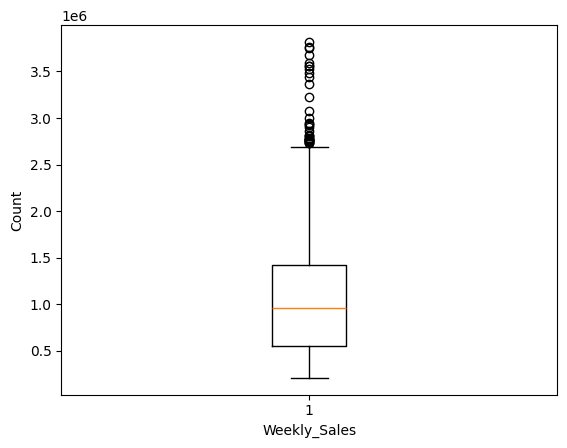

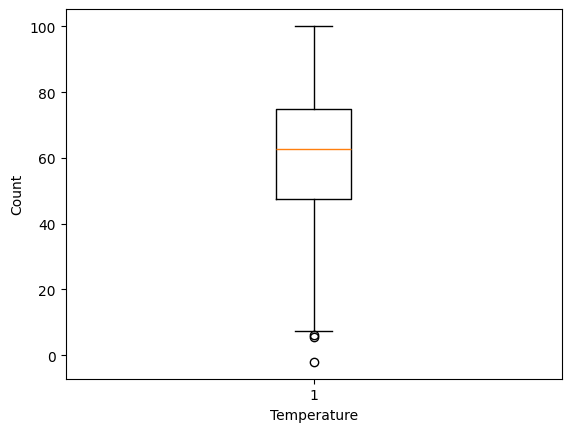

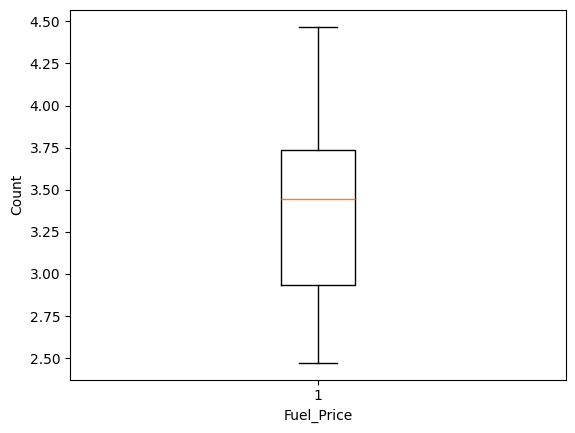

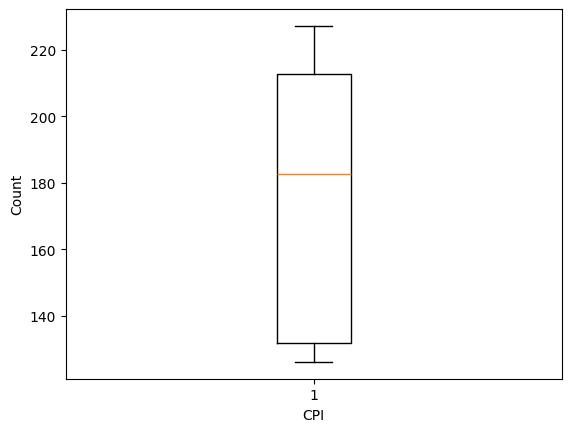

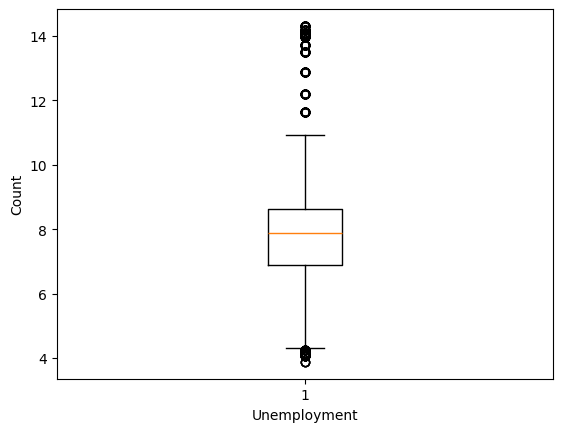

In [272]:
col=[ 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for   i in col:
    if (data[i].dtypes =="int") or (data[i].dtypes =="float"):
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

In [187]:
col=[ 'Weekly_Sales', 'Temperature', 'Fuel_Price','Unemployment', 'CPI',]
for   i in col:
    Q3=data[i].quantile(0.75)
    Q1=data[i].quantile(0.25)
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    data=data[(data[i]>LL) & (data[i]<UL)]

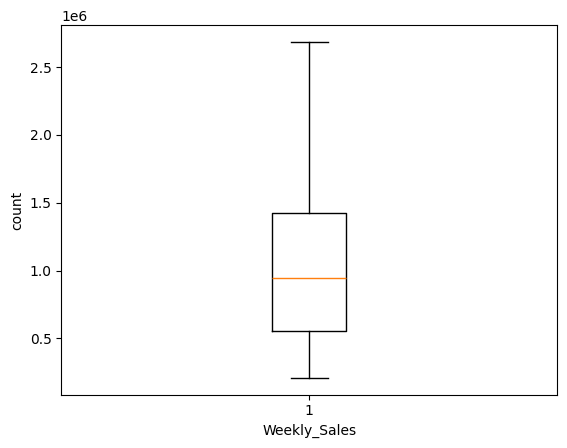

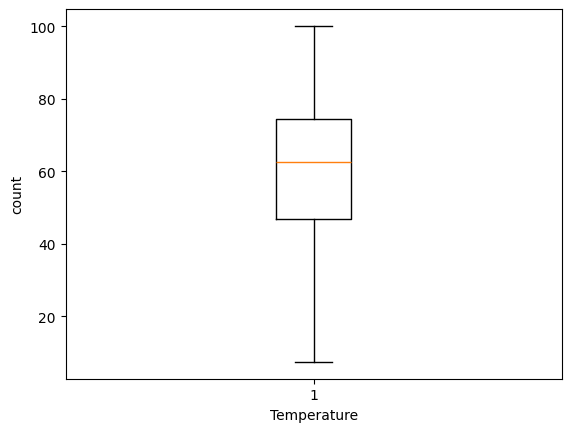

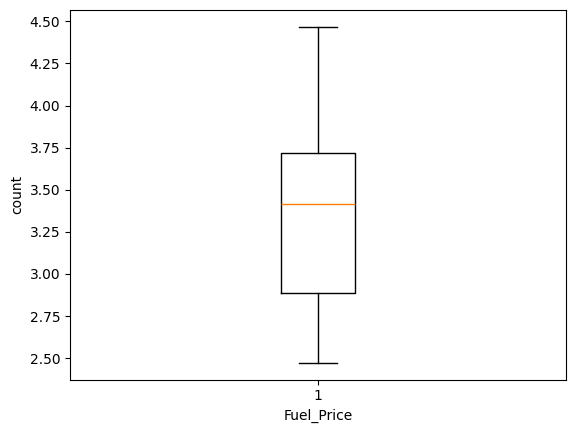

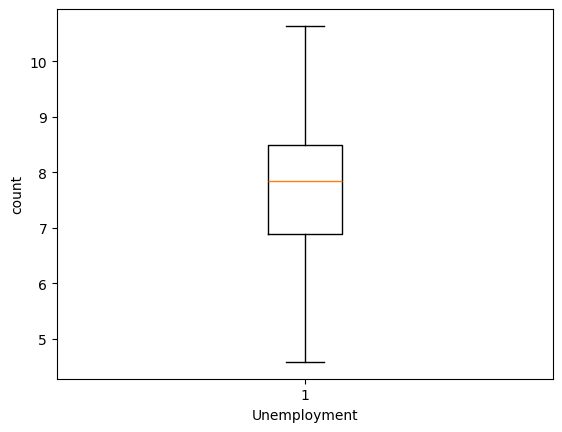

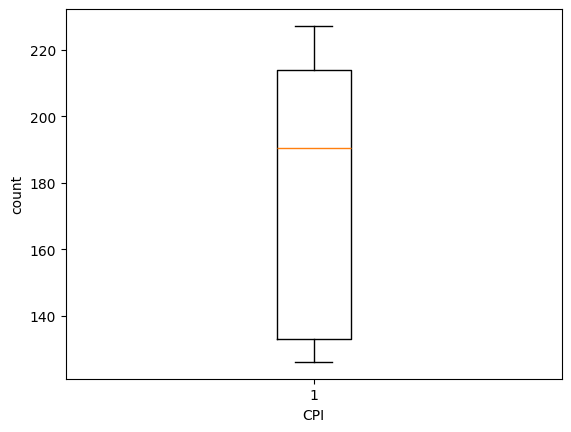

In [188]:
for i in col:
    if (data[i].dtypes =="int") or data[i].dtypes =="float":
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

# Checking for null values 

In [278]:
missing_value=data.isnull().sum()
missing_value_percentage=(missing_value)/data.shape[0]*100
missing_data = pd.concat([missing_value,missing_value_percentage], axis=1, keys=['Total Missing', 'Percent'])
missing_data




,Total Missing,Percent
Store,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0


# Adding new columns for better analysis 

In [279]:

data['Weekly_Saless'] = data['Weekly_Sales'].astype(float)
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Week'] = data['Date'].dt.isocalendar().week
data.info()
data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          6435 non-null   int64         
 1   Date           6435 non-null   datetime64[ns]
 2   Weekly_Sales   6435 non-null   float64       
 3   Holiday_Flag   6435 non-null   int64         
 4   Temperature    6435 non-null   float64       
 5   Fuel_Price     6435 non-null   float64       
 6   CPI            6435 non-null   float64       
 7   Unemployment   6435 non-null   float64       
 8   Weekly_Saless  6435 non-null   float64       
 9   Month          6435 non-null   int32         
 10  Year           6435 non-null   int32         
 11  Week           6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(6), int32(2), int64(2)
memory usage: 534.3 KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.0
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,1.046965e+06,6.447552,2010.965035,25.818182
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2.099862e+05,1.000000,2010.000000,1.0
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,5.533501e+05,4.000000,2010.000000,14.0
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,9.607460e+05,6.000000,2011.000000,26.0
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,1.420159e+06,9.000000,2012.000000,38.0
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,3.818686e+06,12.000000,2012.000000,52.0
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,5.643666e+05,3.238308,0.797019,14.129201


 # Now we have our clean dataset

In [205]:
data.to_csv("Cleaned_Walmart.csv", index=False)
print("New Shape:", data.shape)
data.head()

New Shape: (5839, 12)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1643690.90,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1641957.44,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1611968.17,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1409727.59,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1554806.68,3,2010,9


# Analaysis 

## Lets Check Store Vs. Weekly sale

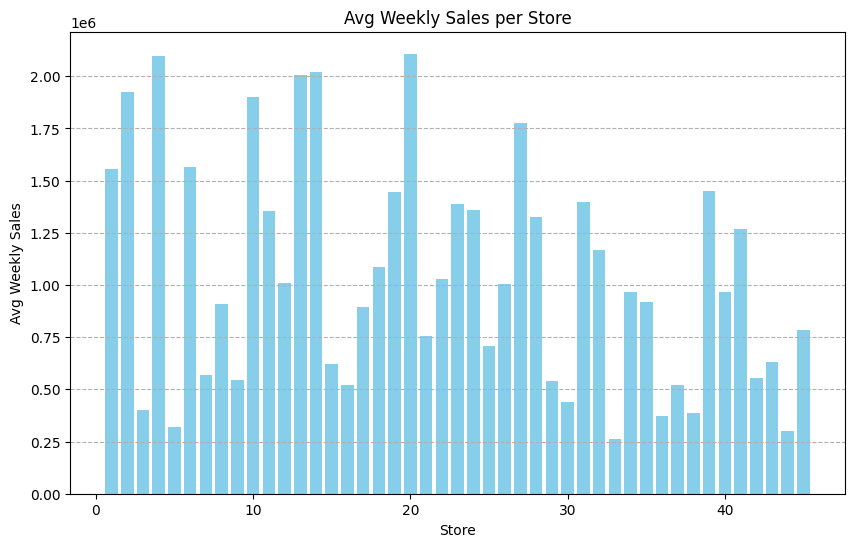

In [326]:
sale_per_store = data.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sale_per_store['Store'], sale_per_store['Weekly_Sales'], color="skyblue")
plt.xlabel('Store')
plt.ylabel('Avg Weekly Sales')
plt.title('Avg Weekly Sales per Store')
plt.grid(axis='y', linestyle='--')
plt.show()


## Weekly sales  over  total span of time  

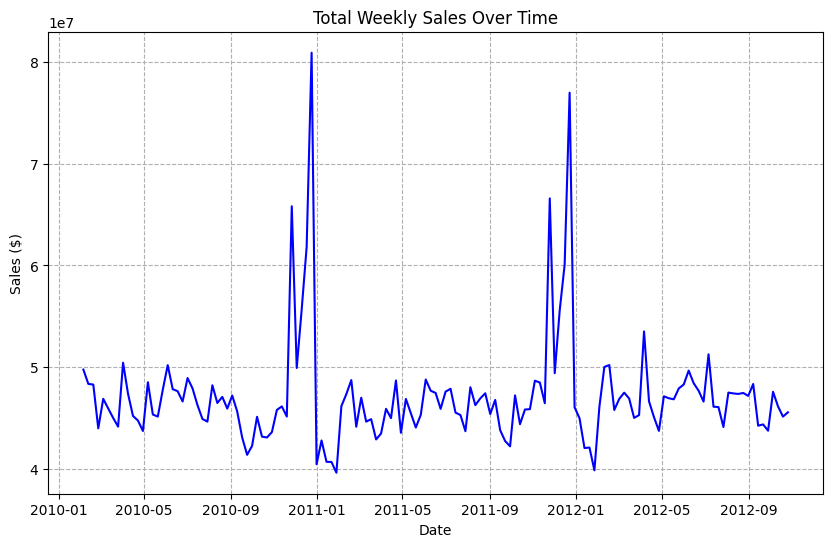

In [320]:
sales_by_month = data.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month.index, sales_by_month.values, color='blue')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(linestyle='--')
plt.show()

## Finding top 2 months  in terms Sales

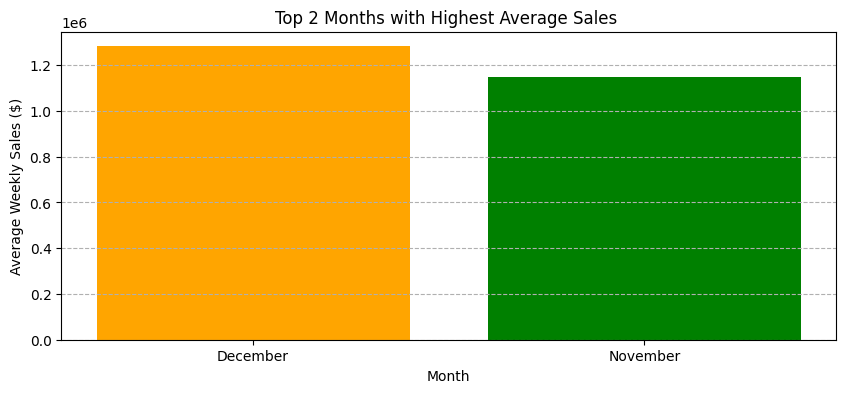

In [321]:

data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_name[x])
monthly_sales = data.groupby('Month_Name')['Weekly_Sales'].mean()
top_2_months = monthly_sales.sort_values(ascending=False).head(2)

plt.figure(figsize=(10,4))
plt.bar(top_2_months.index, top_2_months.values, color=['orange', 'green'])
plt.title("Top 2 Months with Highest Average Sales ")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales ($)")
plt.grid(axis='y', linestyle='--')
plt.show()

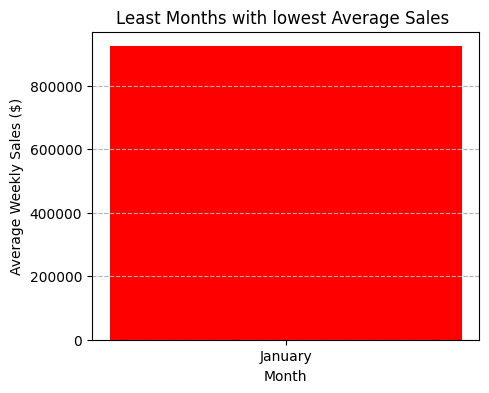

In [322]:
data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_name[x])
monthly_sales = data.groupby('Month_Name')['Weekly_Sales'].mean()
least_month = monthly_sales.sort_values().head(1)

plt.figure(figsize=(5,4))
plt.bar(least_month.index, least_month.values, color=[ 'red'])
plt.title("Least Months with lowest Average Sales ")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales ($)")
plt.grid(axis='y', linestyle='--')
plt.show()

# Here , NOV & DEC are the top performers  and the JAN is month have least  performers 

## Lets find Top 5 Stores who have done max sales 

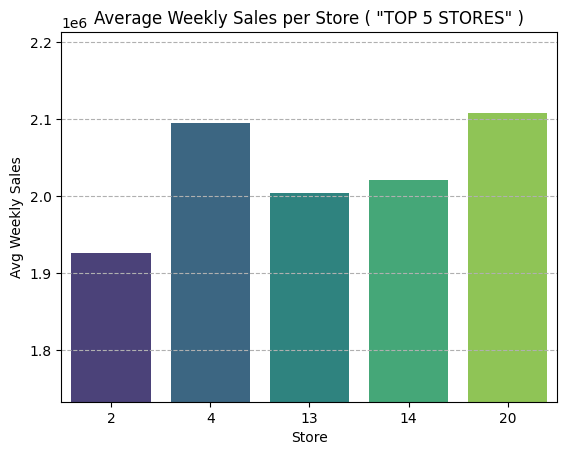

In [328]:

Most_sales=sale_per_store.head(5)
Least_sales=sale_per_store.tail(5)
sns.barplot(x='Store', y='Weekly_Sales', data=Most_sales, palette='viridis')
plt.xlabel('Store')
plt.ylabel('Avg Weekly Sales')
plt.title('Average Weekly Sales per Store ( "TOP 5 STORES" )')
plt.ylim(Most_sales['Weekly_Sales'].min() * 0.9, Most_sales['Weekly_Sales'].max() * 1.05)
plt.grid(axis='y', linestyle='--')
plt.show()

### Hence  Store no.2,4,13,14,20 are the top performers

## Lets find Least 5 Stores who have done min sales 

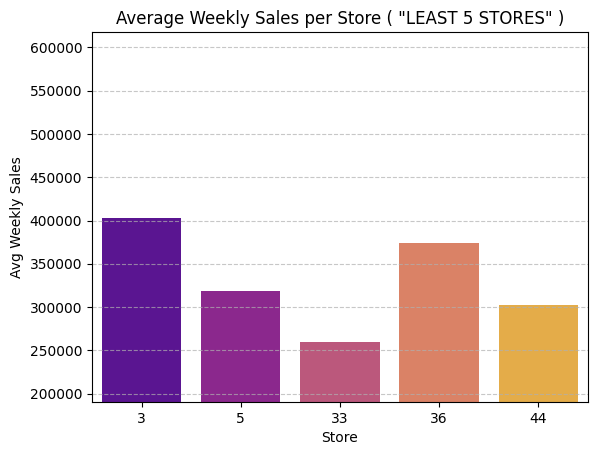

In [157]:


sns.barplot(x='Store', y='Weekly_Sales', data=Least_sales, palette='plasma')
plt.xlabel('Store')
plt.ylabel('Avg Weekly Sales')
plt.title('Average Weekly Sales per Store ( "LEAST 5 STORES" )')
plt.ylim(Most_sales['Weekly_Sales'].min() * 0.1, Most_sales['Weekly_Sales'].max() * 0.3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Hence Store no. 3,5,33,36,44 are the least performers

# How  the  special  Holiday  affecting the weekly sales of various stores?

(937130.74218797, 1179032.2869733335)

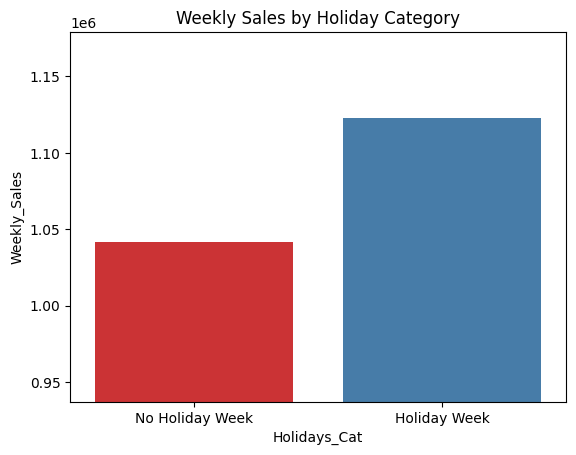

In [333]:
df_holidays = data.copy()
bins = [-0.1, 0.5, 1.1]  
labels = ['No Holiday Week', 'Holiday Week'] 
df_holidays['Holidays_Cat'] = pd.cut(df_holidays['Holiday_Flag'], bins=bins, labels=labels)

df_holidays_sales= df_holidays.groupby('Holidays_Cat')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Holidays_Cat', y='Weekly_Sales', data=df_holidays_sales, palette='Set1')     
plt.title('Weekly Sales by Holiday Category')
plt.ylim(df_holidays_sales['Weekly_Sales'].min() * 0.9, df_holidays_sales['Weekly_Sales'].max() * 1.05)


In [337]:

avg_sales_no_holiday = df_holidays_sales.loc[df_holidays_sales['Holidays_Cat'] == 'No Holiday Week', 'Weekly_Sales'].values[0]
avg_sales_holiday = df_holidays_sales.loc[df_holidays_sales['Holidays_Cat'] == 'Holiday Week', 'Weekly_Sales'].values[0]
percent_increase = ((avg_sales_holiday - avg_sales_no_holiday) / avg_sales_no_holiday) * 100

print(f"Average Weekly Sales (No Holiday Week): {avg_sales_no_holiday:,.2f}")
print(f"Average Weekly Sales (Holiday Week): {avg_sales_holiday:,.2f}")
print(f"Percentage Increase in Sales during Holiday Week: {percent_increase:.2f}%")



Average Weekly Sales (No Holiday Week): 1,041,256.38
Average Weekly Sales (Holiday Week): 1,122,887.89
Percentage Increase in Sales during Holiday Week: 7.84%


## Percentage Increase in Sales during Holiday Week: 7.84%

(831496.096225, 1345956.8154666668)

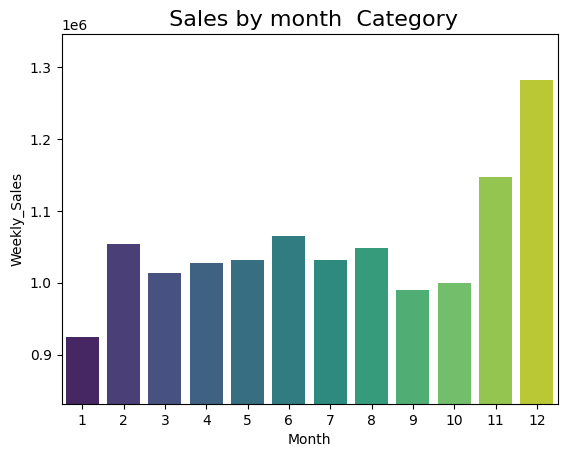

In [339]:
df_months = data.copy()
df_months= df_months.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Month', y='Weekly_Sales', data=df_months, palette='viridis')     
plt.title(' Sales by month  Category', fontsize=16)
plt.ylim(df_months['Weekly_Sales'].min() * 0.9, df_months['Weekly_Sales'].max() * 1.05)


## Here, we can see that the despite  of September have holiday still its avg sales is less 

In [ ]:


top2_months = [11,12]
avg_topsales = df[df['Month'].isin(top2_months)]['Weekly_Sales'].mean()
selected_months = [1,2,3,4,5,6,7,8,9,10]
avg_sales = df[df['Month'].isin(selected_months)]['Weekly_Sales'].mean()

percent_increase = ((avg_topsales- avg_sales) / avg_sales) * 100
print(f"Average Sales : {avg_sales:,.2f}")
print(f"Average  Sales of top 2 performing sales : {avg_topsales:,.2f}")
print(f"Percentage Increase in Sales during top 2 months: {percent_increase:.2f}%")

Average Sales : 1,024,048.48
Average  Sales of top 2 performing sales : 1,149,145.96
Percentage Increase in Sales during top 2 months: 12.22%


# Percentage Increase in Sales during Top 2 months: 12.22%

# How does Unemployment_Rate affect the weekly sales in any manner?

In [158]:
df=data.copy()
import warnings
warnings.filterwarnings('ignore')
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week
count,5917.000000,5917,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.0
mean,22.801251,2011-06-14 17:15:31.485550080,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305,1.039313e+06,6.444989,2010.959101,25.800913
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000,2.099862e+05,1.000000,2010.000000,1.0
25%,11.000000,2010-10-08 00:00:00,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000,5.525292e+05,4.000000,2010.000000,14.0
50%,22.000000,2011-06-10 00:00:00,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000,9.472292e+05,6.000000,2011.000000,26.0
75%,34.000000,2012-02-17 00:00:00,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000,1.427624e+06,9.000000,2012.000000,37.0
max,45.000000,2012-10-26 00:00:00,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000,2.685352e+06,12.000000,2012.000000,52.0
std,13.094060,NaN,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337,5.519450e+05,3.220417,0.795111,14.045441


In [342]:
bins1=[4,6,8,10,12]
labels1=['4-6','6.1-8','8.1-10','10.1-12']
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins1,labels=labels1)
un_counts=df['Unemployment_Rate_Cat'].value_counts().sort_index().reset_index()

print(un_counts)
df.head()


  Unemployment_Rate_Cat  count
0                   4-6    515
1                 6.1-8   2772
2                8.1-10   2379
3               10.1-12    251


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week,Month_Name,Unemployment_Rate_Cat
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1643690.90,2,2010,5,February,8.1-10
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1641957.44,2,2010,6,February,8.1-10
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1611968.17,2,2010,7,February,8.1-10
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1409727.59,2,2010,8,February,8.1-10
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1554806.68,3,2010,9,March,8.1-10


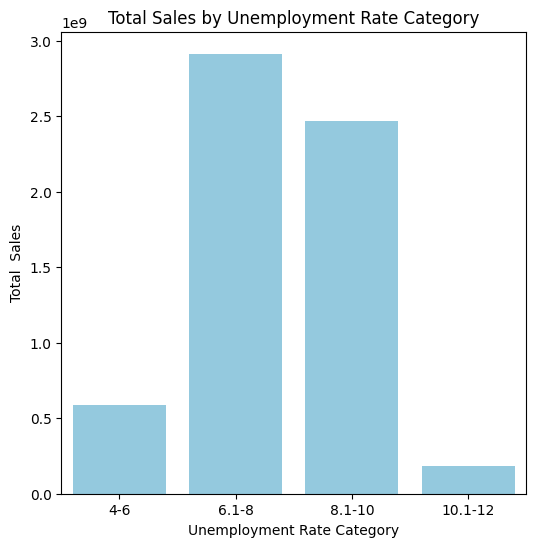

In [343]:
Un_Employment_Sales=df.groupby("Unemployment_Rate_Cat")['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='Unemployment_Rate_Cat', y='Weekly_Sales', data=Un_Employment_Sales, color='skyblue')
plt.xlabel('Unemployment Rate Category')
plt.ylabel('Total  Sales')
plt.title('Total Sales by Unemployment Rate Category')
plt.xticks(rotation=0)
plt.show()

<Axes: >

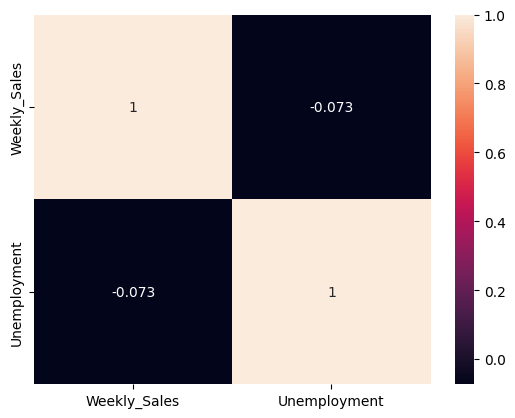

In [344]:
correlation = df[['Weekly_Sales', 'Unemployment']].corr()
sns.heatmap(correlation,annot=True)

# How does Temperature affect the weekly sales in any manner?

In [345]:
df2=data.copy()
df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week,Month_Name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1643690.90,2,2010,5,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1641957.44,2,2010,6,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1611968.17,2,2010,7,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1409727.59,2,2010,8,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1554806.68,3,2010,9,March


In [346]:
df2.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.0
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,1.046965e+06,6.447552,2010.965035,25.818182
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2.099862e+05,1.000000,2010.000000,1.0
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,5.533501e+05,4.000000,2010.000000,14.0
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,9.607460e+05,6.000000,2011.000000,26.0
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,1.420159e+06,9.000000,2012.000000,38.0
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,3.818686e+06,12.000000,2012.000000,52.0
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,5.643666e+05,3.238308,0.797019,14.129201


In [347]:


bins = [-5,0,10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
temp_label = ['(-5)-0','1-10','11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-101']
df2['Temp_Cat'] = pd.cut(df2["Temperature"], bins=bins, labels=temp_label)
temp_counts = df2['Temp_Cat'].value_counts().sort_index()
print(temp_counts)
df2.head()


Temp_Cat
(-5)-0       1
1-10         5
11-20       80
21-30      327
31-40      576
41-50      866
51-60     1082
61-70     1226
71-80     1215
81-90      876
91-101     181
Name: count, dtype: int64


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week,Month_Name,Temp_Cat
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1643690.90,2,2010,5,February,41-50
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1641957.44,2,2010,6,February,31-40
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1611968.17,2,2010,7,February,31-40
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1409727.59,2,2010,8,February,41-50
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1554806.68,3,2010,9,March,41-50


In [348]:
temp_sales = df2.groupby('Temp_Cat')['Weekly_Sales'].sum().reset_index()

temp_sales

,Temp_Cat,Weekly_Sales
0,(-5)-0,5.580278e+05
1,1-10,4.304461e+06
2,11-20,6.787929e+07
3,21-30,3.475819e+08
4,31-40,6.491767e+08
5,41-50,9.640847e+08
6,51-60,1.122390e+09
7,61-70,1.295800e+09
8,71-80,1.289691e+09
9,81-90,8.515029e+08


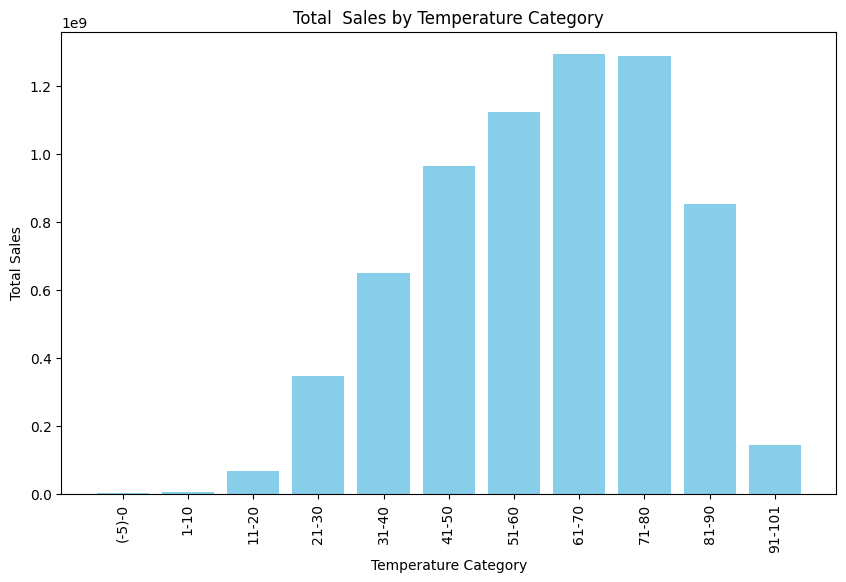

In [349]:


plt.figure(figsize=(10, 6))
plt.bar(temp_sales['Temp_Cat'], temp_sales['Weekly_Sales'], color='skyblue')
plt.xlabel('Temperature Category')
plt.ylabel('Total Sales')
plt.title('Total  Sales by Temperature Category')
plt.xticks(rotation=90)
plt.show()



<Axes: >

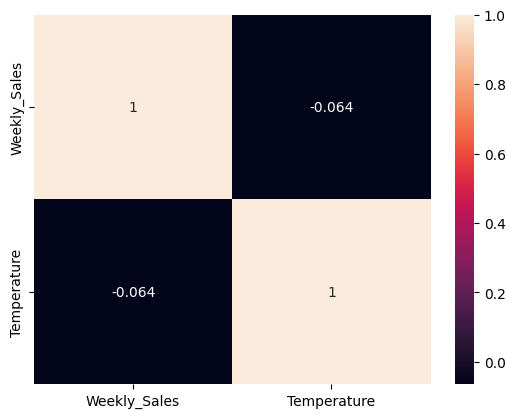

In [350]:
corr_temp = df2[['Weekly_Sales', 'Temperature']].corr()
sns.heatmap(corr_temp,annot=True)


# How does CPI affect the weekly sales in any manner?

In [351]:
df_cpi=data.copy()
df_cpi.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week,Month_Name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1643690.90,2,2010,5,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1641957.44,2,2010,6,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1611968.17,2,2010,7,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1409727.59,2,2010,8,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1554806.68,3,2010,9,March


In [169]:
df_cpi.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week
count,5917.000000,5917,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.0
mean,22.801251,2011-06-14 17:15:31.485550080,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305,1.039313e+06,6.444989,2010.959101,25.800913
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000,2.099862e+05,1.000000,2010.000000,1.0
25%,11.000000,2010-10-08 00:00:00,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000,5.525292e+05,4.000000,2010.000000,14.0
50%,22.000000,2011-06-10 00:00:00,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000,9.472292e+05,6.000000,2011.000000,26.0
75%,34.000000,2012-02-17 00:00:00,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000,1.427624e+06,9.000000,2012.000000,37.0
max,45.000000,2012-10-26 00:00:00,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000,2.685352e+06,12.000000,2012.000000,52.0
std,13.094060,NaN,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337,5.519450e+05,3.220417,0.795111,14.045441


In [341]:
bins = [125,135,145,155,165,175,185,195,205,215,230] 
temp_label = ['126-135','136-145','146-155','156-165','166-175','176-185','186-195','196-205','206-215', '216-230'] 


df_cpi['CPI_Cat'] = pd.cut(df_cpi["CPI"], bins=bins, labels=temp_label)
cpi_counts = df_cpi['CPI_Cat'].value_counts().sort_index()
print(cpi_counts)

CPI_Cat
126-135    1726
136-145     917
146-155       0
156-165       0
166-175       0
176-185     117
186-195     516
196-205     358
206-215    1125
216-230    1158
Name: count, dtype: int64


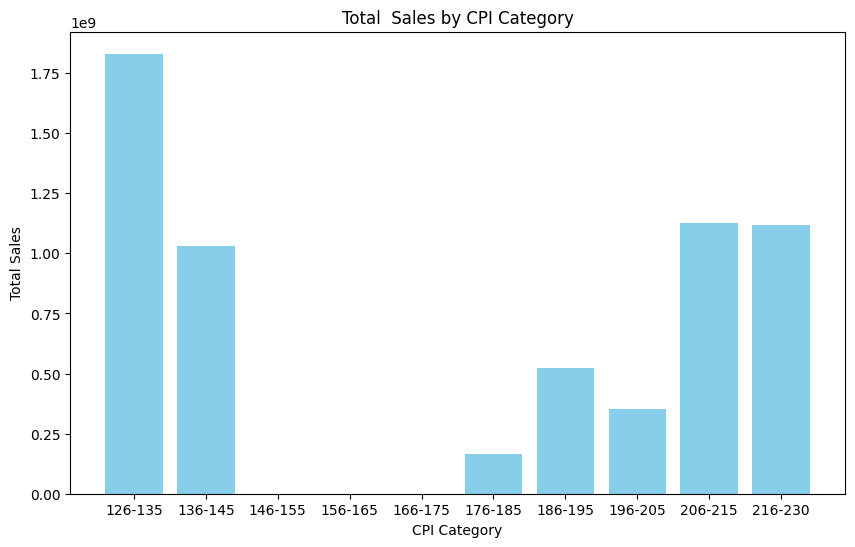

In [171]:
cpi_Sales=df_cpi.groupby("CPI_Cat")['Weekly_Sales'].sum().reset_index()
cpi_Sales

plt.figure(figsize=(10, 6))
plt.bar(cpi_Sales['CPI_Cat'],cpi_Sales['Weekly_Sales'], color='skyblue')
plt.xlabel('CPI Category')
plt.ylabel('Total Sales')
plt.title('Total  Sales by CPI Category')
plt.xticks(rotation=0)
plt.show()



<Axes: >

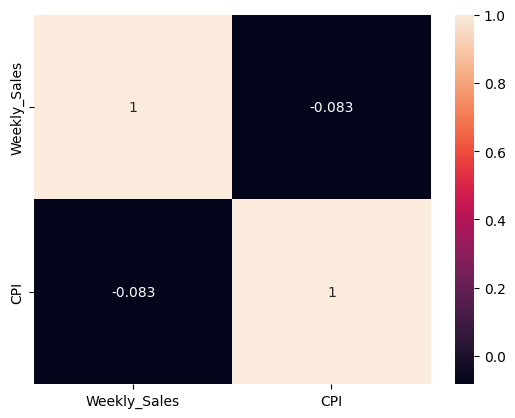

In [172]:
corr_cpi = df_cpi[['Weekly_Sales', 'CPI']].corr()
sns.heatmap(corr_cpi, annot=True)

# How does Fuel_price affect the weekly sales in any manner?

In [173]:
df_fuel=data.copy()
df_fuel.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Saless,Month,Year,Week,Month_Name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1643690.90,2,2010,5,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,1641957.44,2,2010,6,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1611968.17,2,2010,7,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1409727.59,2,2010,8,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1554806.68,3,2010,9,March


In [352]:
bins= [2.0,2.5,3.0,3.5,4.0,4.5] # Creating bins  and label to sort the tempeture values
labels= ['2.0-2.5','2.6-3.0','3.1-3.5','3.6-4.0','4.1-4.5']

df_fuel['Fuel_Price_Cat'] = pd.cut(df_fuel['Fuel_Price'], bins=bins, labels=labels)

df_fuel_count = df_fuel['Fuel_Price_Cat'].value_counts().sort_index()
df_fuel_count

Fuel_Price_Cat
2.0-2.5       1
2.6-3.0    1833
3.1-3.5    1362
3.6-4.0    2406
4.1-4.5     315
Name: count, dtype: int64

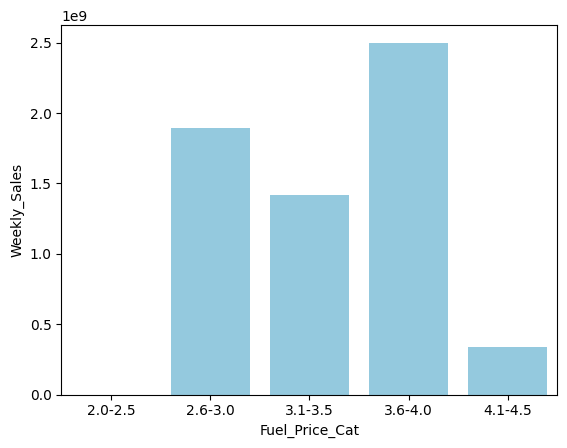

In [175]:
df_fuel_Sales= df_fuel.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()
df_fuel_Sales

sns.barplot(x='Fuel_Price_Cat', y='Weekly_Sales', data=df_fuel_Sales, color='skyblue')

corr_fuel = df_fuel[['Weekly_Sales', 'Fuel_Price']].corr()

<Axes: >

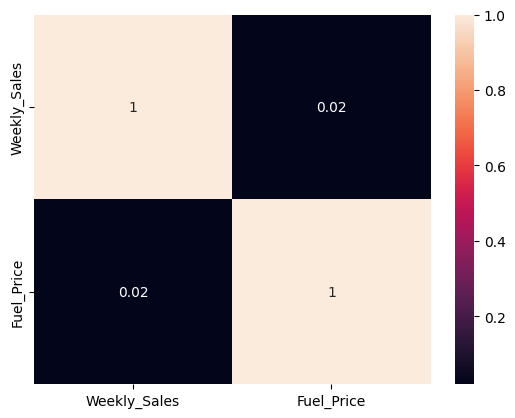

In [176]:
sns.heatmap(corr_fuel, annot=True)